This notebook runs a pipeline with the following steps:
* Create a test Visibility dataset.
   * No visibility sample noise. Just testing that things are working exactly as expected.
   * Using the GLEAM sky model with station-dependent Faraday rotation and everybeam station beam models.
   * Add complex Gaussian noise corruptions to station gains and leakage.
   * Write to disk in MSv2 format.
* Read MSv2 data into Visibility dataset.$^{*}$
* Predict model visibilities (using GLEAM and everybeam).$^{*}$
* Do polarised bandpass calibration.$^{*}$
* Fit for the  $\lambda^{2}$-dependent rotation of each station.
* Redo predict with RM estimates.$^{*}$
* Redo polarised bandpass calibration.$^{*}$
* Check for convergence.

\* xarray dataset map_blocks() is used to distribute frequency sub-bands across dask tasks.

In [1]:
from time import perf_counter

from IPython.display import Image

from ska_sdp_instrumental_calibration.workflow.pipelines import (
    bandpass_polarisation,
)

<frozen abc>:106: FutureWarning: xarray subclass Visibility should explicitly define __slots__


In [2]:
ddir = "/data/EOS_1/mit183"
t0 = perf_counter()
bandpass_polarisation.run(
    {
        # Required external data
        "gleamfile": f"{ddir}/gleamegc.dat",
        "eb_ms": f"{ddir}/SKA/SP-4626/OSKAR_MOCK.ms",
        "eb_coeffs": f"{ddir}/SKA/SP-4626/ska-sdp-func-everybeam/coeffs",
        # Other parameters
        "ms_name": "demo.ms",
        "h5parm_name": "demo.h5",
        "gains": True,
        "leakage": True,
        "rotation": True,
        "wide_channels": True,
    }
)
print(f"pipeline ran in {perf_counter() - t0:.1f} seconds")

2025-05-16 10:54:50,095 - workflow.pipeline_config - INFO - Simulating demo MSv2 input


1|2025-05-16T00:54:50.095Z|INFO|MainThread|__init__|pipeline_config.py#130||Simulating demo MSv2 input


2025-05-16 10:54:50,099 - workflow.pipeline_config - INFO - Initialising the EveryBeam telescope model with /data/EOS_1/mit183/SKA/SP-4626/OSKAR_MOCK.ms


1|2025-05-16T00:54:50.099Z|INFO|MainThread|__init__|pipeline_config.py#185||Initialising the EveryBeam telescope model with /data/EOS_1/mit183/SKA/SP-4626/OSKAR_MOCK.ms


2025-05-16 10:54:50,101 - workflow.pipeline_config - INFO - Generating a demo MSv2 Measurement Set demo.ms


1|2025-05-16T00:54:50.101Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#201||Generating a demo MSv2 Measurement Set demo.ms


2025-05-16 10:54:50,104 - workflow.pipeline_config - INFO - Generating LSM for simulation with:


1|2025-05-16T00:54:50.104Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#208||Generating LSM for simulation with:


2025-05-16 10:54:50,106 - workflow.pipeline_config - INFO -  - Search radius: 5.0 deg


1|2025-05-16T00:54:50.106Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#209|| - Search radius: 5.0 deg


2025-05-16 10:54:50,107 - workflow.pipeline_config - INFO -  - Flux limit: 1 Jy


1|2025-05-16T00:54:50.107Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#210|| - Flux limit: 1 Jy


2025-05-16 10:54:50,109 - workflow.pipeline_config - INFO -  - GLEAMEGC file: /data/EOS_1/mit183/gleamegc.dat


1|2025-05-16T00:54:50.109Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#212|| - GLEAMEGC file: /data/EOS_1/mit183/gleamegc.dat


2025-05-16 10:54:50,713 - processing_tasks.lsm - INFO - extracted 37 GLEAM components


1|2025-05-16T00:54:50.713Z|INFO|MainThread|generate_lsm_from_gleamegc|lsm.py#266||extracted 37 GLEAM components


2025-05-16 10:54:50,714 - workflow.pipeline_config - INFO - LSM contains 37 components


1|2025-05-16T00:54:50.714Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#231||LSM contains 37 components


2025-05-16 10:54:50,736 - workflow.utils - INFO - Using AA1-Low with 20 stations


1|2025-05-16T00:54:50.736Z|INFO|MainThread|create_demo_ms|utils.py#167||Using AA1-Low with 20 stations


2025-05-16 10:54:51,333 - workflow.utils - INFO - Applying DI lambda^2-dependent rotations during predict


1|2025-05-16T00:54:51.333Z|INFO|MainThread|create_demo_ms|utils.py#200||Applying DI lambda^2-dependent rotations during predict


2025-05-16 10:54:51,335 - processing_tasks.predict - INFO - Using EveryBeam model in predict


1|2025-05-16T00:54:51.335Z|INFO|MainThread|predict_from_components|predict.py#169||Using EveryBeam model in predict
1|2025-05-16T00:54:51.340Z|INFO|MainThread|__init__|beams.py#86||Initialising beams for Low
1|2025-05-16T00:54:51.397Z|INFO|MainThread|__init__|beams.py#95||Setting beam normalisation for OSKAR data


2025-05-16 10:54:53,304 - workflow.utils - INFO - Applying direction-independent gain corruptions


1|2025-05-16T00:54:53.304Z|INFO|MainThread|create_demo_ms|utils.py#223||Applying direction-independent gain corruptions


2025-05-16 10:54:53,306 - workflow.utils - INFO - Applying direction-independent leakage corruptions


1|2025-05-16T00:54:53.306Z|INFO|MainThread|create_demo_ms|utils.py#236||Applying direction-independent leakage corruptions
1|2025-05-16T00:54:53.772Z|INFO|MainThread|run|bandpass_polarisation.py#81||Starting pipeline with 16-channel chunks
1|2025-05-16T00:54:53.773Z|INFO|MainThread|run|bandpass_polarisation.py#85||No dask cluster supplied. Using LocalCluster
1|2025-05-16T00:54:55.602Z|INFO|MainThread|run|bandpass_polarisation.py#95||Generating LSM for predict with:
1|2025-05-16T00:54:55.603Z|INFO|MainThread|run|bandpass_polarisation.py#96|| - Search radius: 5.0 deg
1|2025-05-16T00:54:55.604Z|INFO|MainThread|run|bandpass_polarisation.py#97|| - Flux limit: 1 Jy
1|2025-05-16T00:54:55.605Z|INFO|MainThread|run|bandpass_polarisation.py#99|| - GLEAMEGC catalogue file: /data/EOS_1/mit183/gleamegc.dat


2025-05-16 10:54:56,255 - processing_tasks.lsm - INFO - extracted 37 GLEAM components


1|2025-05-16T00:54:56.255Z|INFO|MainThread|generate_lsm_from_gleamegc|lsm.py#266||extracted 37 GLEAM components
1|2025-05-16T00:54:56.256Z|INFO|MainThread|run|bandpass_polarisation.py#116||LSM contains 37 components
1|2025-05-16T00:54:56.257Z|WARNING|MainThread|run|bandpass_polarisation.py#119||Not running end-to-end version.
1|2025-05-16T00:54:56.258Z|INFO|MainThread|run|bandpass_polarisation.py#127||Will ingest demo.ms in 16-channel chunks
1|2025-05-16T00:54:56.261Z|INFO|MainThread|create_visibility_from_ms|vis_io_ms.py#339||Reading uni. fields [0], uni. data descs [0]
1|2025-05-16T00:54:56.386Z|INFO|MainThread|run|bandpass_polarisation.py#159||Setting vis predict in 16-channel chunks
1|2025-05-16T00:54:56.444Z|INFO|MainThread|run|bandpass_polarisation.py#170||Setting calibration in 16-channel chunks
1|2025-05-16T00:54:56.445Z|INFO|MainThread|run|bandpass_polarisation.py#171|| - Using solver jones_substitution
1|2025-05-16T00:54:56.446Z|INFO|MainThread|run|bandpass_polarisation.py#17

2025-05-16 10:54:59,959 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 10:54:59,972 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 10:54:59,981 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 10:55:00,113 - processing_tasks.predict - INFO - Using EveryBeam model in predict


1|2025-05-16T00:55:02.645Z|INFO|MainThread|run|bandpass_polarisation.py#188||Fitting differential rotations
1|2025-05-16T00:55:03.533Z|INFO|MainThread|run|bandpass_polarisation.py#193||Re-predicting model vis with RM estimates
1|2025-05-16T00:55:03.571Z|INFO|MainThread|run|bandpass_polarisation.py#203||Resetting calibration in 16-channel chunks
1|2025-05-16T00:55:03.571Z|INFO|MainThread|run|bandpass_polarisation.py#204|| - First using solver jones_substitution again
1|2025-05-16T00:55:03.650Z|INFO|MainThread|run|bandpass_polarisation.py#213|| - Then improving using solver normal_equations
1|2025-05-16T00:55:03.717Z|INFO|MainThread|run|bandpass_polarisation.py#224||Running graph and returning calibration solutions


2025-05-16 10:55:04,051 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 10:55:04,072 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 10:55:04,133 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 10:55:04,141 - processing_tasks.predict - INFO - Using EveryBeam model in predict


1|2025-05-16T00:55:06.979Z|INFO|MainThread|run|bandpass_polarisation.py#275||Writing solutions to demo.h5


2025-05-16 10:55:06,980 - data_managers.data_export - INFO - exporting cal solutions to demo.h5


1|2025-05-16T00:55:06.980Z|INFO|MainThread|export_gaintable_to_h5parm|export_gaintable.py#29||exporting cal solutions to demo.h5


2025-05-16 10:55:06,985 - data_managers.data_export - INFO - output dimensions: {'time': 1, 'ant': 20, 'freq': 64, 'pol': 4}


1|2025-05-16T00:55:06.985Z|INFO|MainThread|export_gaintable_to_h5parm|export_gaintable.py#63||output dimensions: {'time': 1, 'ant': 20, 'freq': 64, 'pol': 4}
1|2025-05-16T00:55:06.991Z|INFO|MainThread|run|bandpass_polarisation.py#286||Checking results


2025-05-16 10:55:07,592 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 10:55:07,592 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 10:55:07,600 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 10:55:07,652 - processing_tasks.predict - INFO - Using EveryBeam model in predict


1|2025-05-16T00:55:08.659Z|INFO|MainThread|run|bandpass_polarisation.py#291||model max = 11.8
1|2025-05-16T00:55:08.660Z|INFO|MainThread|run|bandpass_polarisation.py#292||corrected max = 11.8
1|2025-05-16T00:55:08.662Z|INFO|MainThread|run|bandpass_polarisation.py#293||diff max = 1.6e-03
1|2025-05-16T00:55:08.664Z|INFO|MainThread|run|bandpass_polarisation.py#294||diff max (relative) = 1.3e-04
1|2025-05-16T00:55:08.665Z|INFO|MainThread|run|bandpass_polarisation.py#299||Convergence checks passed
pipeline ran in 19.0 seconds


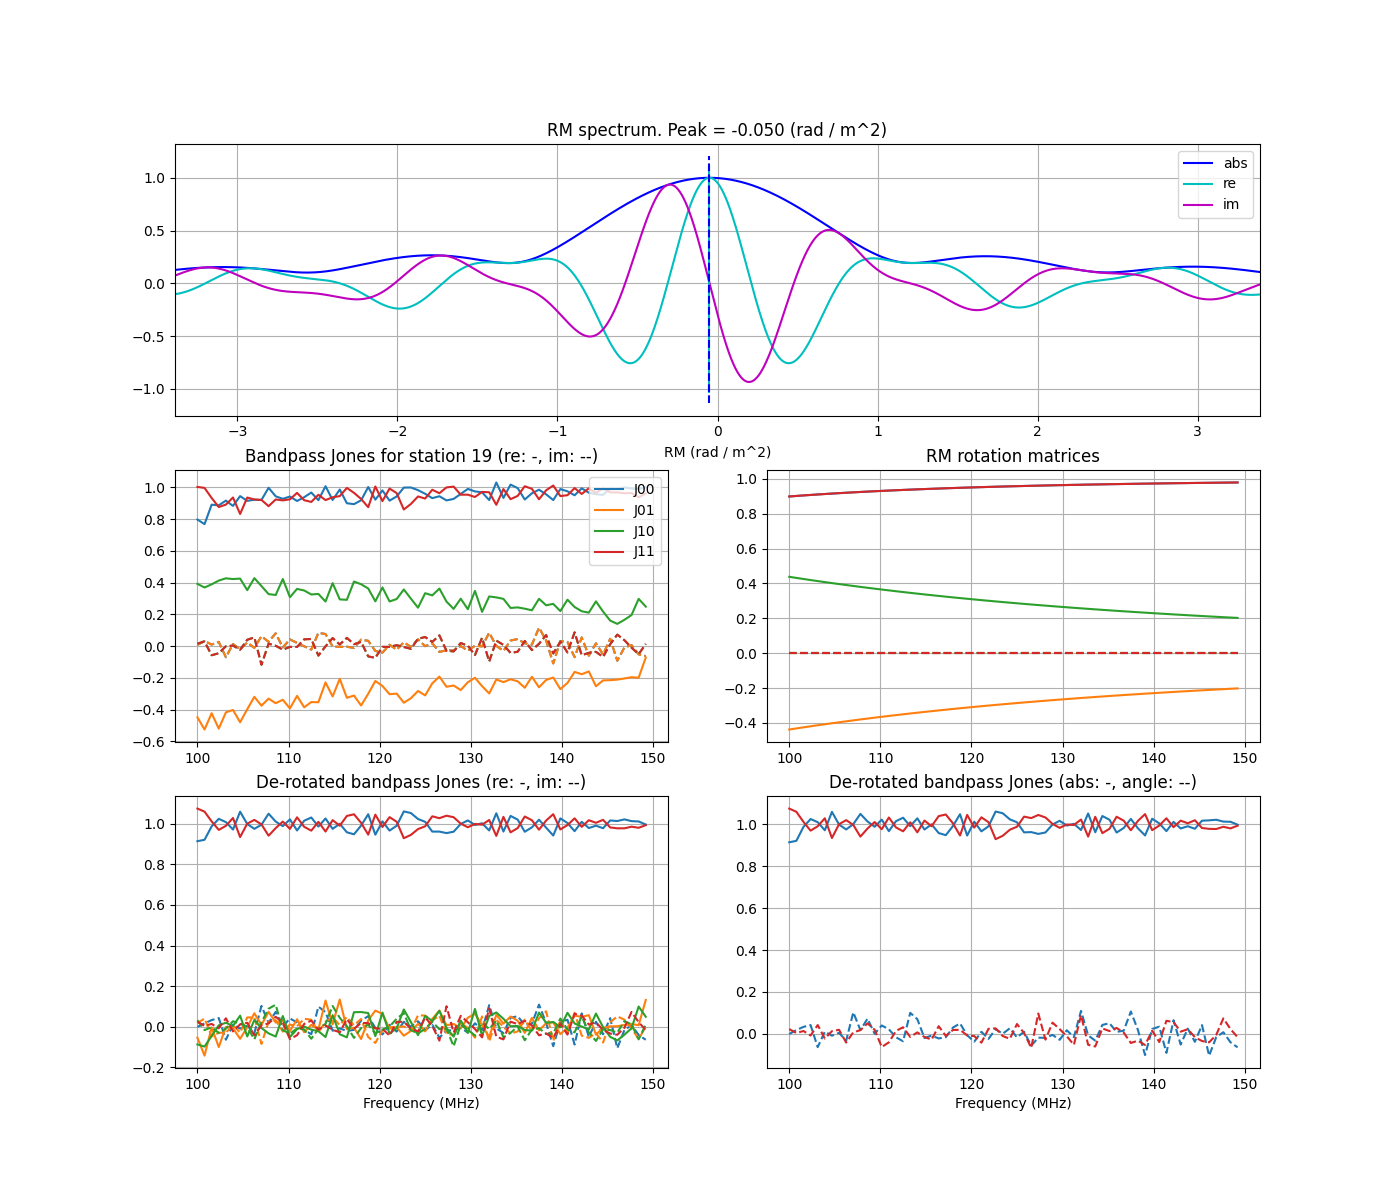

In [3]:
Image(filename="rm-station.png")

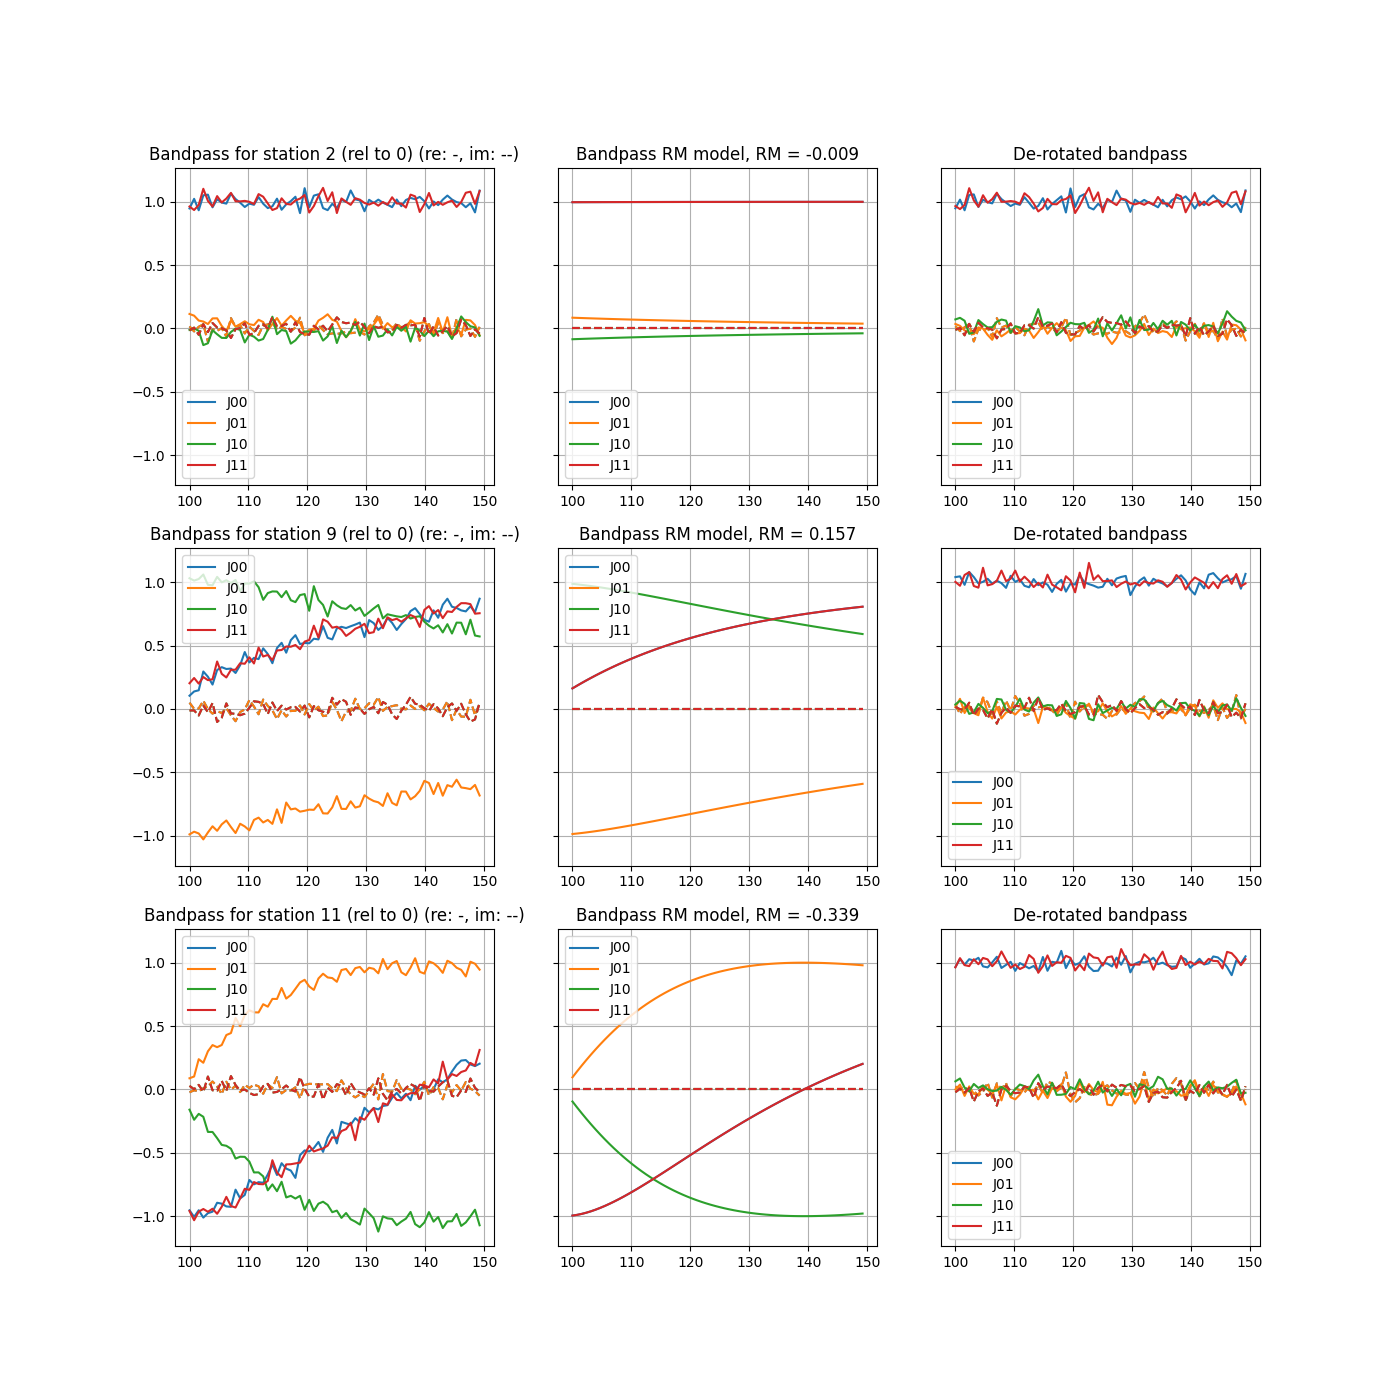

In [4]:
Image(filename="bandpass_stages.png")